# 라이브러리 Import 및 데이터 Read

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 분석 데이터 Read
data = pd.read_csv('data/boston.csv')

# 데이터 확인
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Clustering

: `군집화`를 통해 비슷한 성향을 가진 그룹 탐색
- 여기선 PCA가 시각화에 용이함을 이용
- 13개 변수를 2개의 PCA 변수로 차원 축소
- 2개의 변수로 시각화 - 분류 확인
- 2개의 변수를 13개로 풀어서 확인

In [3]:
# 범주형 데이터 제거
del data['chas']

# 나중에 비교를 위한 medv 컬럼도 복사 후 제거
medv = data['medv']
del data['medv']

In [4]:
# 수월한 시각화 및 설명력을 첨부하기 위해 PCA를 통해 변수를 2개로 압축
# 필요 라이브러리
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
# 정규화 진행
# 객체 생성
scaler = StandardScaler()

# 데이터 학습
scaler.fit(data)
# 변환
scaler_data = scaler.transform(data)

In [6]:
# 객체 생성
pca = PCA(n_components = 2)

# PCA 학습시키기
pca.fit(scaler_data)

PCA(n_components=2)

In [7]:
# 결과값 확인
pca.transform(scaler_data)

array([[-2.09723388, -0.72017904],
       [-1.456003  , -0.94769427],
       [-2.07345404, -0.62533575],
       ...,
       [-0.31128314, -1.39524641],
       [-0.26939083, -1.35059004],
       [-0.12452556, -1.34293829]])

In [8]:
# 데이터 프레임 형태로 변환
data2 = pd.DataFrame(data = pca.transform(scaler_data), columns = ['pc1', 'pc2'])

data2.head()

,pc1,pc2
0,-2.097234,-0.720179
1,-1.456003,-0.947694
2,-2.073454,-0.625336
3,-2.610161,-0.134044
4,-2.456866,-0.229919


# Cluster 개수(K 값) 결정

`KMeans(n_cluster = k)`

- k개의 군집화를 하겠다는 객체 생성

`Kmeans.fit()`

- 학습시키기

`KMeans.inertia_`

- 학습된 KMeans의 응집도를 확인
- 응집도란 각 데이터로부터 자신이 속한 군집의 중심까지의 거리를 의미
- 즉, 낮을수록 군집화가 더 잘 되어있음

`KMeans.predict(data)`

- 학습된 데이터를 바탕으로 데이터를 변환

In [9]:
# 필요 라이브러리
from sklearn.cluster import KMeans

In [10]:
x = [] # k가 몇개인지
y = [] # 응집도가 몇인지

for k in range(1,30) :
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data2)
    
    x.append(k)
    y.append(kmeans.inertia_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


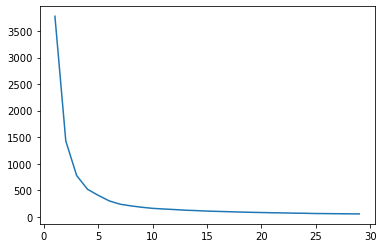

In [11]:
# 그래프 그리기
plt.plot(x, y)

# ELBOW POINT 4 지정 후 Clustering 시작

In [12]:
kmeans = KMeans(n_clusters = 4)

In [13]:
kmeans.fit(data2)

KMeans(n_clusters=4)

In [14]:
data2['labels'] = kmeans.predict(data2)
data2.head()

,pc1,pc2,labels
0,-2.097234,-0.720179,1
1,-1.456003,-0.947694,1
2,-2.073454,-0.625336,1
3,-2.610161,-0.134044,1
4,-2.456866,-0.229919,1


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

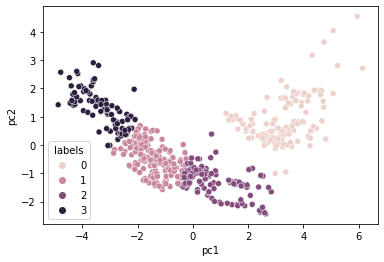

In [15]:
sns.scatterplot(x = 'pc1', y = 'pc2', hue = 'labels', data = data2)

# Clustering 결과 해석

PCA와 Clustering을 통해 결과 해석

가장 먼저 어떠한 그룹이 집 값이 높은지 평균을 비교

In [16]:
# 가장 처음 떼어 두었던 medv 컬럼을 추가
data2['medv'] = medv

data2.head()

,pc1,pc2,labels,medv
0,-2.097234,-0.720179,1,24.0
1,-1.456003,-0.947694,1,21.6
2,-2.073454,-0.625336,1,34.7
3,-2.610161,-0.134044,1,33.4
4,-2.456866,-0.229919,1,36.2


In [17]:
# 시각화를 위해 각 그룹별 medv값을 따로 변수로 생성

mdedv_0 = data2[data2['labels']==0]['medv'].mean()
mdedv_1 = data2[data2['labels']==1]['medv'].mean()
mdedv_2 = data2[data2['labels']==2]['medv'].mean()
mdedv_3 = data2[data2['labels']==3]['medv'].mean()

<AxesSubplot:>

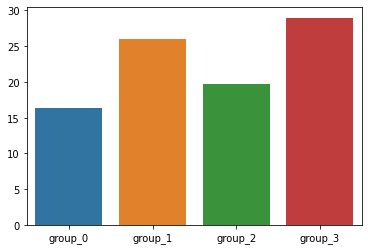

In [18]:
# 모든 과정을 똑같이 하였어도 kmeans의 기본 중심값 설정은 '랜덤'!
sns.barplot(x = ['group_0','group_1','group_2','group_3'], y = [mdedv_0, mdedv_1, mdedv_2, mdedv_3])

# Cluster들의 특징 확인

최상위 그룹과 최하위 그룹의 특징을 살펴보며, 집 값이 높은 이유 혹은 집 값이 낮은 이유 확인

### 최상위층 - 3번그룹
### 최하위층 - 0번그룹

In [20]:
# 원본 데이터에 라벨을 복제
data['labels'] = data2['labels']

In [21]:
# 각 그룹의 데이터를 나누어서 변수에 담음
group = data[(data['labels']==0) | (data['labels']==3)]

In [22]:
# 'labels' 기준으로 그룹을 묶음
group = group.groupby('labels').mean().reset_index()

In [23]:
group

,labels,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0,12.571770,0.0000,18.243881,0.671470,6.010679,89.929851,2.05719,23.701493,666.671642,20.198507,288.733209,18.723358
1,3,0.065127,54.1875,3.750909,0.423147,6.722830,29.660227,6.91729,4.159091,305.420455,16.982955,389.006818,6.153409


# 시각화를 위한 subplot

`plt.subplots(행, 열, figsize=())`

여러가지의 그림을 그리는 방법

<AxesSubplot:xlabel='labels', ylabel='zn'>

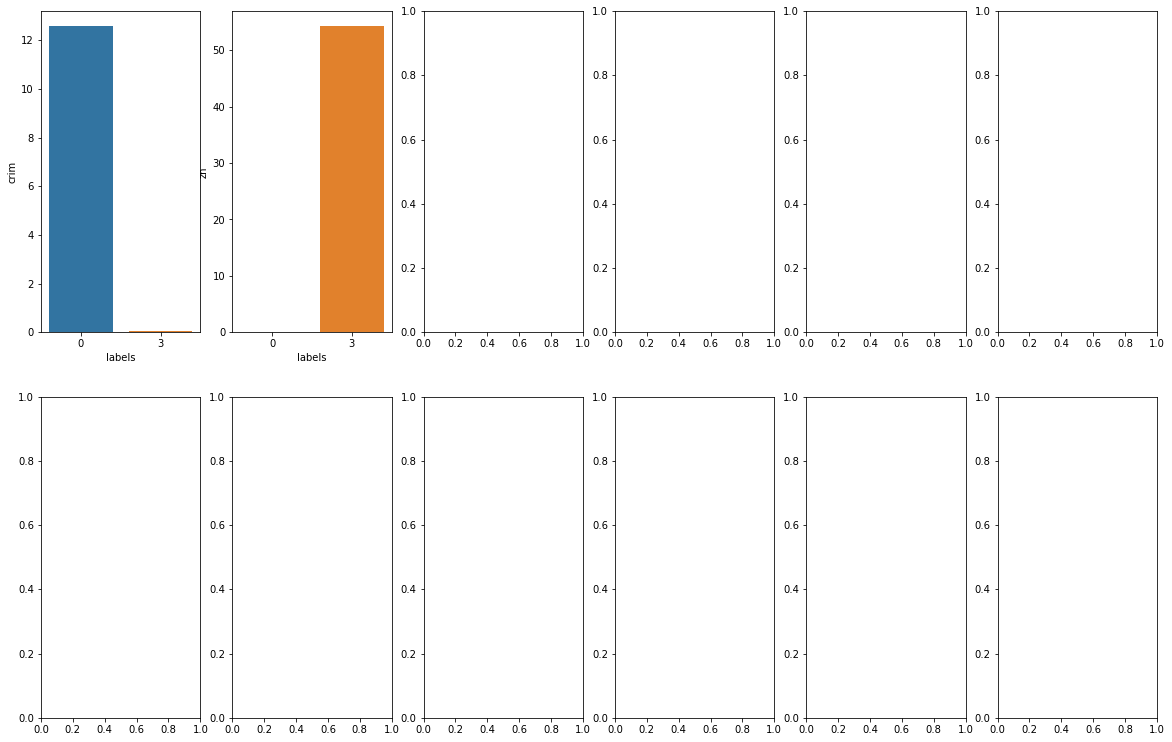

In [24]:
f, ax = plt.subplots(2, 6, figsize = (20, 13))

sns.barplot(x='labels', y='crim', data = group, ax = ax[0,0])
sns.barplot(x='labels', y='zn', data = group, ax = ax[0,1])

In [25]:
column = group.columns

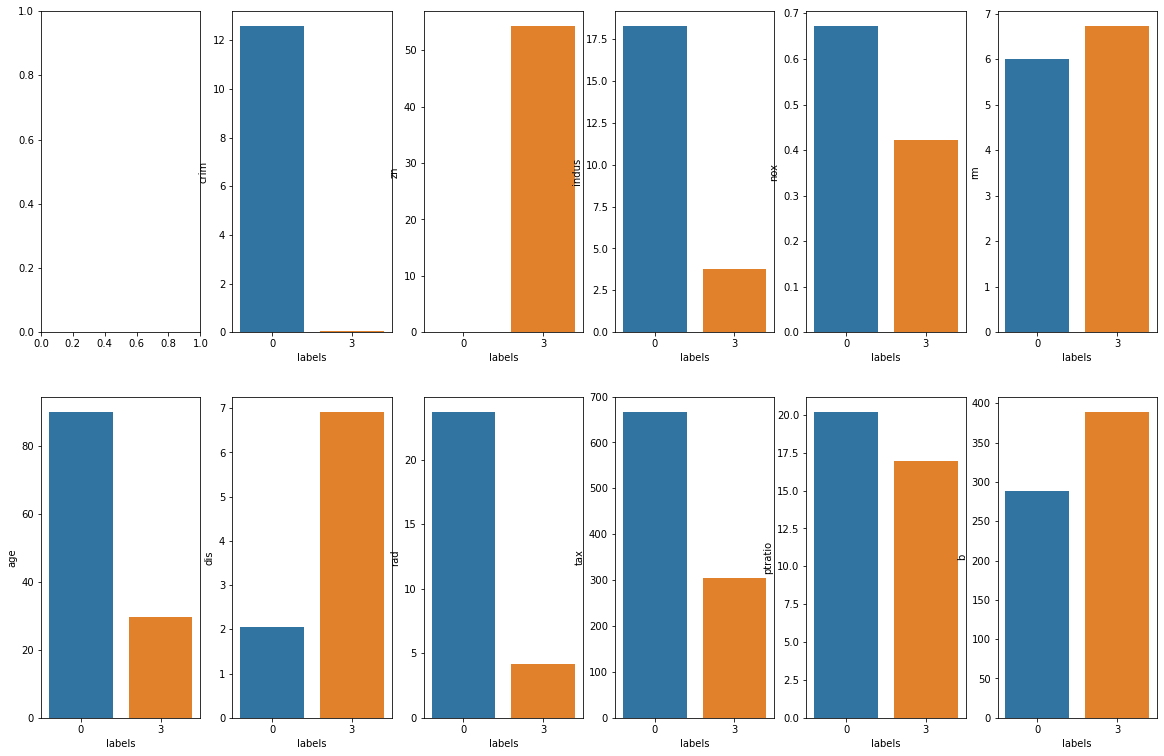

In [26]:
# 반복문을 이용해서 그림 그려보기

f, ax = plt.subplots(2, 6, figsize=(20, 13))

for i in range(1, 12) :
    sns.barplot(x = 'labels', y = column[i], data = group, ax = ax[i//6, i%6])



# Conclusion

- 그래프에 나타나 있듯이, `범죄율이 낮을 수록`, `25,000 평방피트를 초과 거주지역 비율이 높을수록` 좋은 가격을 나타내는 지역임을 알 수 있음.

- 또한, 두가지 뿐 아니라 여러가지의 그래프를 보고도 집 값이 높은 지역의 특징들을 살펴볼 수 있음